# Challenge Amadeus
## 1. Exercise 1
Count lines

At first we hace to open the file bookings.csv.bz2

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2

My file is in /home/dsc/Data/challenge/bookings.csv.bz2

In [238]:
pFolder = '/home/dsc/Data/challenge/'
fBookings = pFolder+'bookings.csv.bz2'
fSearches = pFolder+'searches.csv.bz2'

I try open the file with read_csv and create a DataFrame for the other exercices

In [239]:
#dataBookings = pd.read_csv(fBookings,delimiter='^',iterator=True,chunksize=100000)


In [240]:
#count=0
#for data in dataBookings:
#    count +=1
#print(count)

In [241]:
#dfBookings = pd.concat(dataBookings)

In [226]:
count = 0
with bz2.BZ2File(fBookings, "r") as bz:
    for line in bz:
        count += 1
print(count)

10000011


In [227]:
count = 0
with bz2.BZ2File(fSearches, "r") as bz:
    for line in bz:
        count += 1
print(count)

20390199


## 2. Exercise 2
Top 10 arrival airports in the world in 2013 of bookings file

We will create a sample of bookings and we can play confortable

In [ ]:
! bzcat {pFolder}bookings.csv.bz2 | head -100000 | bzip2 -c > {pFolder}bookings.sample.csv.bz2 

In [ ]:
! bzcat {pFolder}bookings.sample.csv.bz2 | wc 

In [228]:
fSampleBookings = pFolder + 'bookings.sample.csv.bz2'

In [229]:
df_sampleBookings = pd.read_csv(fSampleBookings,delimiter='^')
df_sampleBookings.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
13579,2013-01-07 00:00:00,1G,KW,303c3d997fdad556f25848cee2a32f5f,9730677f86eb9b2121c335c66bccff8d,6220263dff5279de15b2d6c0188adcc3,2013-01-07 00:00:00,17202,0,KWI,...,LHRDOHKWI,BC,E,Y,2013-01-23 20:30:00,2013-01-24 09:12:57,2,2013,1,NULL
13899,2013-01-26 00:00:00,1G,SA,10d45ef9223321e3d6c2e617e8178b90,a5bee175142c0a11b28b0812c9cf9ab9,c69cdefdffe9c70fdf6796426f3213b3,2013-01-07 00:00:00,20927,0,JED,...,CGKDXBJED,OU,U,Y,2013-04-09 07:25:00,2013-04-09 18:02:51,1,2013,1,NULL
43444,2013-01-15 00:00:00,1A,IR,61f232bdb022a925e3b76440f462b92a,e6eafbaac934e20b19c636a7d980dac3,d6dbf565b319c94e1713cfd08acb13d6,2012-12-25 00:00:00,387041,0,IKA,...,IKAISTORD,EU,E,Y,2013-01-18 08:20:00,2013-01-18 16:49:46,-1,2013,1,NULL
97932,2013-01-08 00:00:00,1A,IN,9e586aade06c70687736accbe5e98737,e92059401689ecc80a4aef7f065e1abc,9218323efad894d04df0a605693f0376,2012-12-25 00:00:00,866,9553,ADL,...,ADLSINDEL,DB,B,Y,2013-02-04 12:40:00,2013-02-04 22:06:25,-1,2013,1,NULL
85062,2013-03-19 00:00:00,1A,SA,ae50bfd9217dd423ac28cf7f39149eeb,cf898f870fab68ce029c4e6d7672815b,6fba6024953342a1472c8814c077fc92,2013-03-17 00:00:00,47438,0,CAI,...,CAIJEDGIZ,DG,Y,Y,2013-05-21 22:55:00,2013-05-22 07:13:00,3,2013,3,NULL


In [230]:
df_sampleBookings.columns=df_sampleBookings.columns.str.replace('\s+', '')

In [231]:
df_sampleBookings_sol= df_sampleBookings[['arr_port','pax','year']]

In [232]:
df_sampleBookings_sol=df_sampleBookings_sol[df_sampleBookings_sol['year']==2013]
df_sampleBookings_sol= df_sampleBookings[['arr_port','pax']]
df_sampleBookings_sol['arr_port']= df_sampleBookings['arr_port'].str.strip()

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [233]:
df_sampleBookings_sol.groupby(['arr_port']).sum().sort_values(by='pax',ascending=False).head(10)

,pax
arr_port,
LHR,1006
MCO,861
JFK,795
LAX,761
BKK,747
LAS,732
SFO,705
ORD,686
CDG,676


Note that we have arr_port with negative sum of pax, it's only a sampel and we can lost the good paxes, but if we find this in the full file maybe we have a bad data.

Now we have the exercice 2 solve to the sample, our new target is open the full file.

In [234]:
delimiter='^'
chunksize=500000
usecols=['arr_port','pax','year']
dataBookings = pd.read_csv(fBookings, delimiter=delimiter, compression='bz2', iterator=True, chunksize=chunksize,usecols=usecols)

In [235]:
df_total=pd.DataFrame()
for chunk in dataBookings:
    df=chunk[chunk['year']==2013]
    df=df[['arr_port','pax']]
    df['arr_port']=df['arr_port'].str.strip().str.upper()
    df=df.groupby('arr_port').sum().sort_values(by='pax',ascending=False)
    df_total=df_total.append(df)

In [236]:
df_total.groupby('arr_port').sum().sort_values(by='pax',ascending=False).head(10)

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


## 3. Exercise 3
Plot the monthly number of searches for flights arriving at Malaga, Madrid or Barcelona

In the same way to the exercise 2, we will create a sample of the file to play

In [242]:
! bzcat {pFolder}searches.csv.bz2 | head -100000 | bzip2 -c > {pFolder}searches.sample.csv.bz2 


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [295]:
fSampleSearches = pFolder + 'searches.sample.csv.bz2'

In [296]:
df_sampleSearches = pd.read_csv(fSampleSearches,delimiter='^')
df_sampleSearches.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
23663,2013-01-24,11:50:34,FFP,8c41c8d6c77731947d0d67653f86531f,BR,BSB,CGH,1,2,BSB,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BSB
66294,2013-03-08,04:57:55,MPT,f976842f00052a55080c5ea015cd728c,US,NYC,ATH,1,2,NYC,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SFO
86608,2013-03-28,23:03:56,FFP,aae6b142b5ce2db4931d67460e0c95e1,DE,SZG,DXB,1,2,SZG,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
45126,2013-02-15,18:47:36,MPT,4e05833a9117d44bc8649c315adc12d8,SE,MMA,MAH,1,2,MMA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
80386,2013-03-22,16:39:59,MPT,3561a60621de06ab1badc8ca55699ef3,US,MDW,SAV,1,2,MDW,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC


In [297]:
df_sampleSearches.columns.str.replace(' ','')

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

We can see that the data don't have any columns call mounth and any of their columns hace this information, we have to create a column 'Mounth' and from 'Date' we can take this information.

In [298]:
df_sampleSearches['Date'] = pd.to_datetime(df_sampleSearches['Date'])

In [299]:
df_sampleSearches['Month'] = df_sampleSearches['Date'].apply(lambda x: str(x.year))+'-'+df_sampleSearches['Date'].apply(lambda x: str(x.month))

In [302]:
df_sampleSearches['Month'] = pd.to_datetime(df_sampleSearches['Month'])

In [304]:
df_sampleSearches.sample()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Month
87697,2013-03-29,11:09:05,MPT,8b4fa4e121637f583bfa86ef0fa26c9e,US,PIT,ATL,1,2,PIT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAS,2013-03-01


In [313]:
df_sampleSearches['Destination']=df_sampleSearches['Destination'].str.replace(' ','').str.upper()

In [325]:
df_sampleSearches_solMAD=df_sampleSearches[['Destination','Month']][df_sampleSearches['Destination']=='MAD']
df_sampleSearches_solAGP=df_sampleSearches[['Destination','Month']][df_sampleSearches['Destination']=='AGP']
df_sampleSearches_solBCN=df_sampleSearches[['Destination','Month']][df_sampleSearches['Destination']=='BCN']

In [340]:
print(df_sampleSearches_solMAD.groupby('Month').count())
print(df_sampleSearches_solAGP.groupby('Month').count())
print(df_sampleSearches_solBCN.groupby('Month').count())

            Destination
Month                  
2013-01-01          425
2013-02-01          400
2013-03-01          433
2013-04-01          147
            Destination
Month                  
2013-01-01          169
2013-02-01          147
2013-03-01          187
2013-04-01           31
            Destination
Month                  
2013-01-01          517
2013-02-01          497
2013-03-01          536
2013-04-01          174


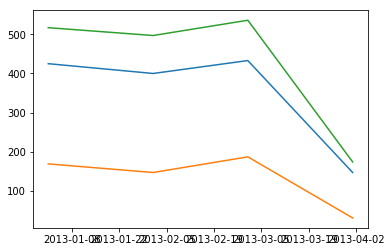

In [339]:
plt.plot(df_sampleSearches_solMAD.groupby('Month').count())
plt.plot(df_sampleSearches_solAGP.groupby('Month').count())
plt.plot(df_sampleSearches_solBCN.groupby('Month').count())